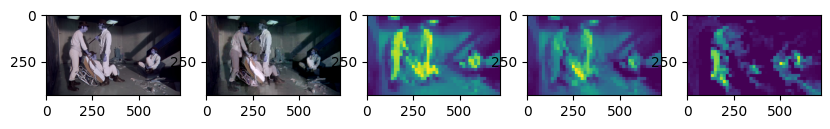

average mean: 7.665843621399177, max mean: 78, min mean: 0


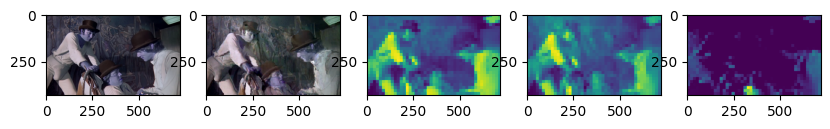

average mean: 6.036213991769547, max mean: 115, min mean: 0


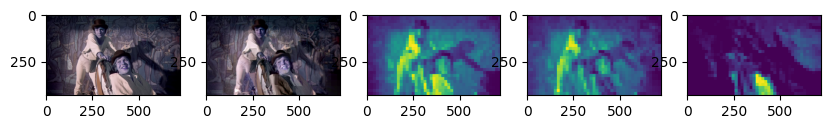

average mean: 12.098765432098766, max mean: 144, min mean: 0


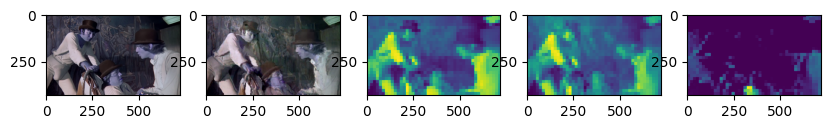

average mean: 5.97119341563786, max mean: 115, min mean: 0


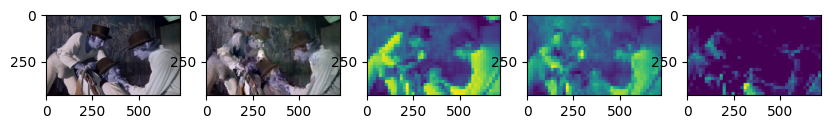

average mean: 8.246913580246913, max mean: 135, min mean: 0


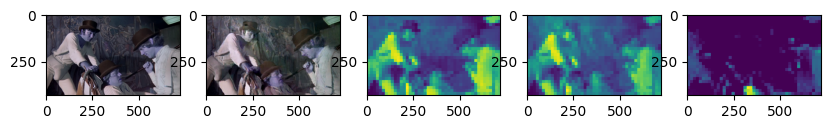

average mean: 5.560493827160494, max mean: 102, min mean: 0


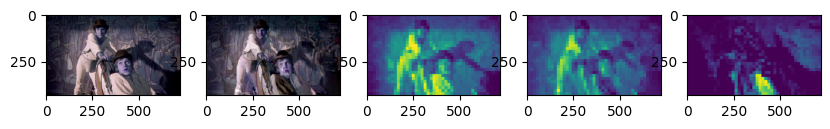

average mean: 12.418930041152263, max mean: 142, min mean: 0


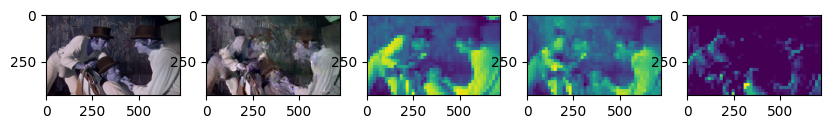

average mean: 9.263374485596708, max mean: 151, min mean: 0


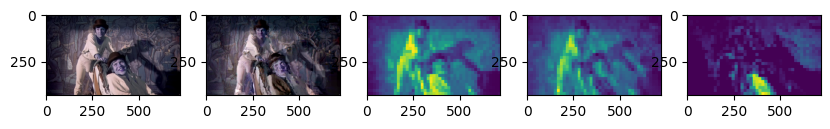

average mean: 12.278189300411523, max mean: 145, min mean: 0


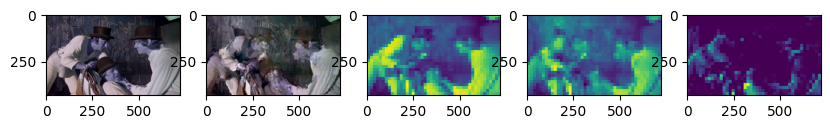

average mean: 9.19917695473251, max mean: 151, min mean: 0


In [15]:
frame_nums = [617,1151,11,1169,1504,930,215,1795,337,1775] #случайные кадры
src_f = 'old_commit_frames'
dest_f = 'last_commit_frames'
import imutils
import cv2
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


for frame in frame_nums:
    old, new = f"{src_f}/frame-{frame}.png", f"{dest_f}/frame-{frame}.png"
    i_old, i_new = cv2.imread(old), cv2.imread(new)
    gray_old, gray_new = cv2.cvtColor(i_old, cv2.COLOR_BGR2GRAY), cv2.cvtColor(i_new, cv2.COLOR_BGR2GRAY)
    # print(type(gray_old),gray_old.shape)
    #gray_... shape = [height, width]
    for row in range(0, gray_old.shape[0], 16):
        for col in range(0, gray_old.shape[1], 16):
            old_block = gray_old[row:row+16, col:col+16]
            new_block = gray_new[row:row+16, col:col+16]
            old_mean, new_mean = old_block.mean(), new_block.mean()
            gray_old[row:row+16, col:col+16] = old_mean
            gray_new[row:row+16, col:col+16] = new_mean


    # (_, diff) = compare_ssim(gray_old, gray_new, full=True)
    diff = cv2.subtract(gray_old, gray_new)
    # diff = (diff * 255).astype("uint8")
    # thresh = cv2.threshold(diff, 0, 255,
	#     cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    # cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    #     cv2.CHAIN_APPROX_SIMPLE)
    # cnts = imutils.grab_contours(cnts)
    # for c in cnts:
    #     # compute the bounding box of the contour and then draw the
    #     # bounding box on both input images to represent where the two
    #     # images differ
    #     (x, y, w, h) = cv2.boundingRect(c)
    #     cv2.rectangle(i_old, (x, y), (x + w, y + h), (0, 0, 255), 2)
    #     cv2.rectangle(i_new, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # show the output images
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(figsize=(10, 5), ncols=5)
    ax1.imshow(i_old, cmap='gray')
    ax2.imshow(i_new, cmap='gray')
    ax3.imshow(gray_old)
    ax4.imshow(gray_new)
    ax5.imshow(diff)
    # cv2.imshow("Thresh", thresh)
    plt.show()    
    print(f'average mean: {diff.mean()}, max mean: {diff.max()}, min mean: {diff.min()}')